**CSCI 5922 : Neural Networks and Deep Learning**
**Lab Assignment 1: Feedforward Neural Networks**

1. Neural Network Hyperparameters

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Part 1 :Load datasets

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

df = pd.read_excel("/content/drive/MyDrive/NN DL/car_evaluation.xlsx")
df

,buying,maintainance,doors,persons,luggage_capacity,safety,car_acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


Dataset preprocessing
Using one hot encoding to convert categories to numeric format*

In [ ]:
import warnings
warnings.filterwarnings('ignore')

df1 = pd.get_dummies(data=df, columns=['buying','maintainance','doors','persons','luggage_capacity','safety'])

# create numerical categories for the target variable

def target_col(row):
  if row['car_acceptability'] == "unacc":
    return 0
  elif row['car_acceptability'] == "acc":
    return 1
  elif row['car_acceptability'] == "good":
    return 2
  elif row['car_acceptability'] == "vgood":
    return 3

df1['car_target'] = df1.apply(target_col,axis=1)
df1.drop(columns=['car_acceptability'], inplace=True)
df1
# standardization of data is not required, as all the features are tranformed into categories of 0's and 1's

,buying_high,buying_low,buying_med,buying_vhigh,maintainance_high,maintainance_low,maintainance_med,maintainance_vhigh,doors_2,doors_3,...,persons_2,persons_4,persons_more,luggage_capacity_big,luggage_capacity_med,luggage_capacity_small,safety_high,safety_low,safety_med,car_target
0,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
3,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
4,0,0,0,1,0,0,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,2
1724,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,3
1725,0,1,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1726,0,1,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,2


Part 2: Create train and test split of 70/30

In [ ]:
import warnings
warnings.filterwarnings('ignore')

X = df1[['buying_high', 'buying_low', 'buying_med', 'buying_vhigh',
       'maintainance_high', 'maintainance_low', 'maintainance_med',
       'maintainance_vhigh', 'doors_2', 'doors_3', 'doors_4', 'doors_5more',
       'persons_2', 'persons_4', 'persons_more', 'luggage_capacity_big',
       'luggage_capacity_med', 'luggage_capacity_small', 'safety_high',
       'safety_low', 'safety_med']]
y = df1[['car_target']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Part 3: Train NN (MLP) with hidden layers = 2, 3, 4 and
three different activation functions sigmoid, tanh and relu

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.neural_network import MLPClassifier

def mlp_func(layer,iter,batch,solver,activation,x,y):
  mlp = MLPClassifier(hidden_layer_sizes=layer, max_iter = iter, batch_size = batch, solver = solver ,activation=activation,random_state=1)
  mlp.fit(x,y)
  l = mlp.n_layers_
  a = mlp.activation
  loss = mlp.loss_
  return mlp,l,a,loss

mlp1,l1,a1,loss1 = mlp_func([4,4],100,10,'adam','logistic',X_train,y_train)
mlp2,l2,a2,loss2 =  mlp_func([4,4],100,10,'adam','tanh',X_train,y_train)
mlp3,l3,a3,loss3 =  mlp_func([4,4],100,10,'adam','relu',X_train,y_train)

mlp4,l4,a4,loss4 = mlp_func([4,4,4],100,10,'adam','logistic',X_train,y_train)
mlp5,l5,a5,loss5 =  mlp_func([4,4,4],100,10,'adam','tanh',X_train,y_train)
mlp6,l6,a6,loss6 =  mlp_func([4,4,4],100,10,'adam','relu',X_train,y_train)

mlp7,l7,a7,loss7 = mlp_func([4,4,4,4],100,10,'adam','logistic',X_train,y_train)
mlp8,l8,a8,loss8 =  mlp_func([4,4,4,4],100,10,'adam','tanh',X_train,y_train)
mlp9,l9,a9,loss9 =  mlp_func([4,4,4,4],100,10,'adam','relu',X_train,y_train)


Part 4: Confusion Matrix and Accuracy

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Accuracy
from sklearn import metrics
def eval_metrics(x,y,mlp):
  y_predicted = mlp.predict(x)
  metric = metrics.classification_report(y, y_predicted)
  return metric

In [ ]:
import warnings
warnings.filterwarnings('ignore')
print("Number of hidden Layers is : 2 and Activation Function is :",a1)
y_pred1 = eval_metrics(X_test,y_test,mlp1)
print(y_pred1)

Number of hidden Layers is : 2 and Activation Function is : logistic
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       358
           1       0.70      0.93      0.80       118
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00        24

    accuracy                           0.88       519
   macro avg       0.42      0.48      0.44       519
weighted avg       0.83      0.88      0.86       519



In [ ]:
import warnings
warnings.filterwarnings('ignore')
print("Number of hidden Layers is : 2 and Activation Function is :",a2)
y_pred2 = eval_metrics(X_test,y_test,mlp2)
print(y_pred2)

Number of hidden Layers is : 2 and Activation Function is : tanh
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       358
           1       0.92      0.90      0.91       118
           2       0.76      0.84      0.80        19
           3       0.88      0.96      0.92        24

    accuracy                           0.96       519
   macro avg       0.89      0.92      0.90       519
weighted avg       0.96      0.96      0.96       519



In [ ]:
import warnings
warnings.filterwarnings('ignore')
print("Number of hidden Layers is : 2 and Activation Function is :",a3)
y_pred3 = eval_metrics(X_test,y_test,mlp3)
print(y_pred3)

Number of hidden Layers is : 2 and Activation Function is : relu
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       358
           1       0.89      0.90      0.89       118
           2       0.75      0.79      0.77        19
           3       0.88      0.96      0.92        24

    accuracy                           0.95       519
   macro avg       0.88      0.90      0.89       519
weighted avg       0.95      0.95      0.95       519



In [ ]:
import warnings
warnings.filterwarnings('ignore')
print("Number of hidden Layers is : 3 and Activation Function is :",a4)
y_pred4 = eval_metrics(X_test,y_test,mlp4)
print(y_pred4)

Number of hidden Layers is : 3 and Activation Function is : logistic
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       358
           1       0.72      0.87      0.79       118
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00        24

    accuracy                           0.87       519
   macro avg       0.42      0.46      0.44       519
weighted avg       0.83      0.87      0.85       519



In [ ]:
import warnings
warnings.filterwarnings('ignore')
print("Number of hidden Layers is : 3 and Activation Function is :",a5)
y_pred5 = eval_metrics(X_test,y_test,mlp5)
print(y_pred5)

Number of hidden Layers is : 3 and Activation Function is : tanh
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       358
           1       0.95      0.85      0.90       118
           2       0.63      0.89      0.74        19
           3       0.88      0.92      0.90        24

    accuracy                           0.95       519
   macro avg       0.86      0.91      0.88       519
weighted avg       0.95      0.95      0.95       519



In [ ]:
import warnings
warnings.filterwarnings('ignore')
print("Number of hidden Layers is : 3 and Activation Function is :",a6)
y_pred6 = eval_metrics(X_test,y_test,mlp6)
print(y_pred6)

Number of hidden Layers is : 3 and Activation Function is : relu
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       358
           1       0.97      0.92      0.94       118
           2       0.76      0.84      0.80        19
           3       0.88      0.92      0.90        24

    accuracy                           0.97       519
   macro avg       0.90      0.92      0.91       519
weighted avg       0.97      0.97      0.97       519



In [ ]:
import warnings
warnings.filterwarnings('ignore')
print("Number of hidden Layers is : 4 and Activation Function is :",a7)
y_pred7 = eval_metrics(X_test,y_test,mlp7)
print(y_pred7)

Number of hidden Layers is : 4 and Activation Function is : logistic
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       358
           1       0.67      0.96      0.79       118
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00        24

    accuracy                           0.88       519
   macro avg       0.41      0.48      0.44       519
weighted avg       0.83      0.88      0.85       519



In [ ]:
import warnings
warnings.filterwarnings('ignore')
print("Number of hidden Layers is : 4 and Activation Function is :",a8)
y_pred8 = eval_metrics(X_test,y_test,mlp8)
print(y_pred8)

Number of hidden Layers is : 4 and Activation Function is : tanh
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       358
           1       0.94      0.89      0.91       118
           2       0.38      0.95      0.54        19
           3       1.00      0.12      0.22        24

    accuracy                           0.92       519
   macro avg       0.83      0.74      0.67       519
weighted avg       0.96      0.92      0.92       519



In [ ]:
import warnings
warnings.filterwarnings('ignore')
print("Number of hidden Layers is : 4 and Activation Function is :",a9)
y_pred9 = eval_metrics(X_test,y_test,mlp9)
print(y_pred9)


Number of hidden Layers is : 4 and Activation Function is : relu
              precision    recall  f1-score   support

           0       0.69      1.00      0.82       358
           1       0.00      0.00      0.00       118
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00        24

    accuracy                           0.69       519
   macro avg       0.17      0.25      0.20       519
weighted avg       0.48      0.69      0.56       519



Part 4 : Plot of Confusion Matrix

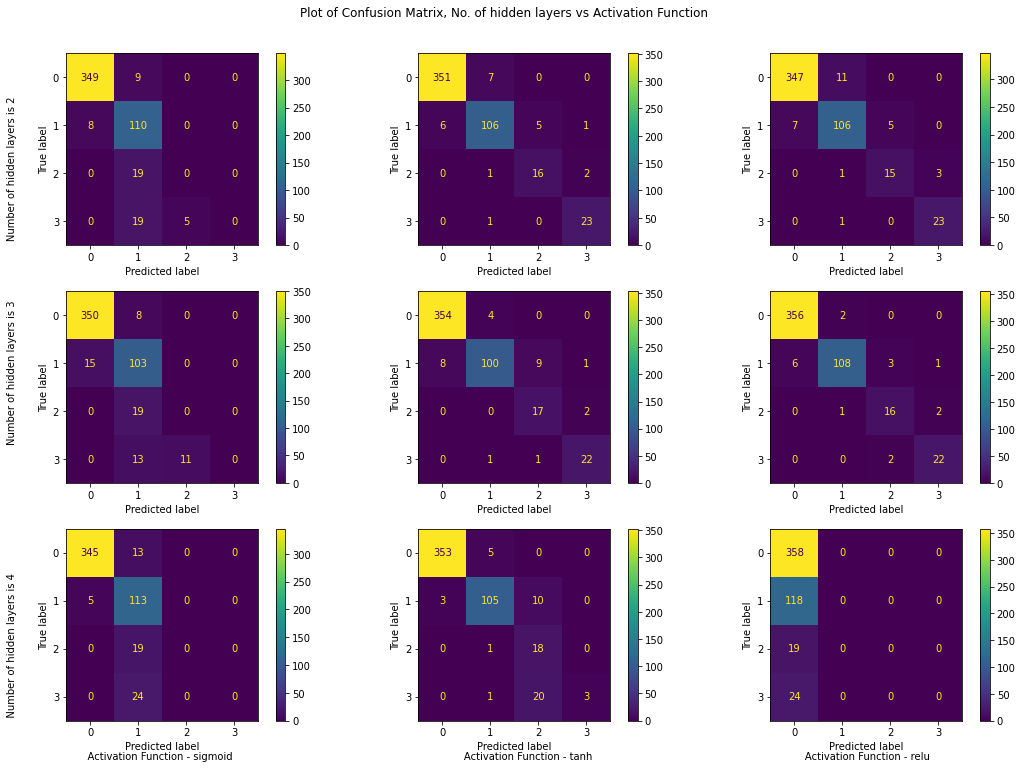

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
classifiers = [mlp1,mlp2,mlp3,mlp4,mlp5,mlp6,mlp7,mlp8,mlp9]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
for i, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(i,X_test,y_test,ax=ax,cmap='viridis')
plt.tight_layout()
fig.text(0.08, 0.005, 'Activation Function - sigmoid', ha='left')
fig.text(0.04, 0.05, 'Layers is 2', va='bottom', rotation='vertical')
fig.suptitle('Plot of Confusion Matrix, No. of hidden layers vs Activation Function',y=1.05)
plt.show()


2. Impact of Training Duration and Training Data

Part 1: Load datasets

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

df = pd.read_excel("/content/drive/MyDrive/NN DL/car_evaluation.xlsx")

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Dataset preprocessing using one hot encoding to convert categories to numeric format

df1 = pd.get_dummies(data=df, columns=['buying','maintainance','doors','persons','luggage_capacity','safety'])

# create numerical categories for the target variable
# standardization of data is not required,
# as all the features are tranformed into categories of 0's and 1's

def target_col(row):
  if row['car_acceptability'] == "unacc":
    return 0
  elif row['car_acceptability'] == "acc":
    return 1
  elif row['car_acceptability'] == "good":
    return 2
  elif row['car_acceptability'] == "vgood":
    return 3

df1['car_target'] = df1.apply(target_col,axis=1)
df1.drop(columns=['car_acceptability'], inplace=True)



Part 2: Create train and test split - 70/30

In [ ]:
import warnings
warnings.filterwarnings('ignore')

X = df1[['buying_high', 'buying_low', 'buying_med', 'buying_vhigh',
       'maintainance_high', 'maintainance_low', 'maintainance_med',
       'maintainance_vhigh', 'doors_2', 'doors_3', 'doors_4', 'doors_5more',
       'persons_2', 'persons_4', 'persons_more', 'luggage_capacity_big',
       'luggage_capacity_med', 'luggage_capacity_small', 'safety_high',
       'safety_low', 'safety_med']]
y = df1[['car_target']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Part 3 : Train Neural Network

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


def nn_train(layer,iter,batch,solver,activation,x,y,x1,y1):
  accuracy = []
  no_epochs = []
  for i in range(1,iter+1,10):

    mlp = MLPClassifier(hidden_layer_sizes=layer, max_iter = i, batch_size = batch, solver = solver,activation=activation,random_state=1)
    mlp.fit(x,y)
    mlp.predict(x1)
    s = mlp.score(x1,y1)
    n = mlp.n_layers_
    a = mlp.activation
    accuracy.append(s)
    no_epochs.append(i)

  return accuracy,n,a,no_epochs

X_train20, X_test20, y_train20, y_test20 = train_test_split(X_train, y_train, test_size=0.80, random_state=42)
mlp_1_acc,n_1,a_1,e_1 = nn_train([2,3,3],100,10,'adam','relu',X_train20,y_train20,X_test,y_test)

X_train40, X_test40, y_train40, y_test40 = train_test_split(X_train, y_train, test_size=0.60, random_state=42)
mlp_2_acc,n_2,a_2,e_2 = nn_train([2,3,3],100,10,'adam','relu',X_train40,y_train40,X_test,y_test)

X_train60, X_test80, y_train60, y_test80 = train_test_split(X_train, y_train, test_size=0.40, random_state=42)
mlp_3_acc,n_3,a_3,e_3 = nn_train([2,3,3],100,10,'adam','relu',X_train60,y_train60,X_test,y_test)

X_train80, X_test80, y_train80, y_test80 = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
mlp_4_acc,n_4,a_4,e_4 = nn_train([2,3,3],100,10,'adam','relu',X_train80,y_train80,X_test,y_test)

X_train100, X_test100, y_train100, y_test100 = X_train, X_test, y_train, y_test
mlp_5_acc,n_5,a_5,e_5 = nn_train([2,3,3],100,10,'adam','relu',X_train100,y_train100,X_test,y_test)


Part 4 : Model Evaluation on test set

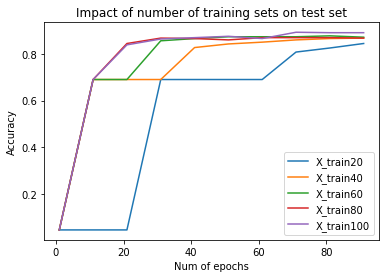

In [ ]:
import warnings
warnings.filterwarnings('ignore')

total_accuracy = [mlp_1_acc,mlp_2_acc,mlp_3_acc,mlp_4_acc,mlp_5_acc]
total_epoch = [e_1, e_2, e_3, e_4, e_5]

labels = ["X_train20", "X_train40","X_train60", "X_train80", "X_train100"]
for i in range(len(total_accuracy)):
  plt.plot(total_epoch[i], total_accuracy[i], label = labels[i])

plt.xlabel("Num of epochs")
plt.ylabel("Accuracy")
plt.title("Impact of number of training sets on test set")
plt.legend()
plt.show()